## MODEL Building (Under sampling dataset)

In [1]:
#importing modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,  auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing under sampling dataset
train_df = pd.read_csv(Path('Resources/cleaned-data/2019loans_us.csv'))
test_df = pd.read_csv(Path('Resources/cleaned-data/2020Q1loans_us.csv'))

In [3]:
# looking train data
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N,low_risk
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N,low_risk
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N,low_risk


In [156]:
train_df["home_ownership"].value_counts()

MORTGAGE    5708
RENT        4966
OWN         1441
ANY           65
Name: home_ownership, dtype: int64

In [4]:
# looking test data
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N,low_risk
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N,low_risk
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N,low_risk


In [5]:
train_df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'm

In [6]:
#shape of training data
train_df.shape

(12180, 84)

In [7]:
#shape of test data
test_df.shape

(4702, 84)

In [8]:
#train_df.info()

#removing unnessary columns from training and testing set
train_df.drop(columns=['Unnamed: 0', 'index'], inplace=True)
test_df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [9]:
train_df['loan_status'].value_counts()

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

## Train and test set

In [10]:
# create feature matrix (X) #selecting all columns except 'loan_status'
X_train=train_df.drop('loan_status', axis=1) 
X_test=test_df.drop('loan_status', axis=1) 

# create response vector (y) ##selecting 'loan_status'
y_train=train_df['loan_status'].values  
y_test=test_df['loan_status'].values  

In [11]:
y_train

array(['low_risk', 'low_risk', 'low_risk', ..., 'high_risk', 'high_risk',
       'high_risk'], dtype=object)

## Converting categorical data to numeric

In [12]:
# Convert categorical data to numeric
X_train_dumy=pd.get_dummies(X_train)
X_test_dumy=pd.get_dummies(X_test)

In [13]:
#shape of test and train after pd.get_dummies
print(X_train_dumy.shape)
print(X_test_dumy.shape)

(12180, 92)
(4702, 91)


In [14]:
#adding the missing columns in test data(no dept_settlement_flag)
X_test_dumy['debt_settlement_flag_Y']=0

In [15]:
#shape of test and train after pd.get_dummies
print(X_train_dumy.shape)
print(X_test_dumy.shape)

(12180, 92)
(4702, 92)


## Scaling using StandardScalar

In [172]:
 # Converting output labels to 0 and 1
y_train_label = LabelEncoder().fit_transform(y_train)
y_train=y_train_label
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
 # Converting output labels to 0 and 1
y_test_label = LabelEncoder().fit_transform(y_test)
y_test=y_test_label

In [18]:
# Create a StandardScaler() model and fit it to the training data
X_scaler = StandardScaler().fit(X_train_dumy)

In [19]:
# Transform the training and testing data by using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train_dumy)
X_test_scaled = X_scaler.transform(X_test_dumy)

In [20]:
#shape of test and train after standard scalar
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(12180, 92)
(4702, 92)


## LogisticRegression

In [21]:
# Creating a Logistic Regression model on the scaled data
lr= LogisticRegression()

# Fit the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
#printing the accuracy score
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

Training Score: 0.710919540229885
Testing Score: 0.7598894087622289


In [23]:
#score of training set using cross_val_score
cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([0.6818555 , 0.67364532, 0.7089491 , 0.72003284, 0.70648604])

In [24]:
#predection on the train set and confusion matrix
#cross_val_predict performs k-fold cross-validation but instead of returning evaluation scores it return the prediction made in each fold.
y_train_pred=cross_val_predict(lr, X_train_scaled, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[3866, 2224],
       [1452, 4638]])

In [25]:
#predection on the test set and confusion matrix
y_pred=lr.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[1764,  587],
       [ 542, 1809]])

In [26]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2351
           1       0.76      0.77      0.76      2351

    accuracy                           0.76      4702
   macro avg       0.76      0.76      0.76      4702
weighted avg       0.76      0.76      0.76      4702



In [27]:
#roc curve
y_proba_lr = lr.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_lr)

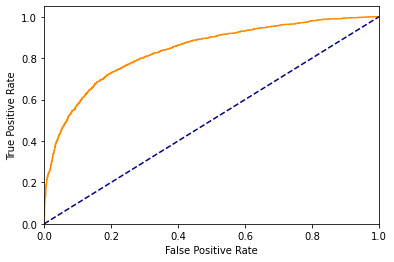

In [28]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [29]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.8379492622034189

## KNeighbors Classifier

In [30]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
#printing the accuracy score
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')

Training Score: 0.7874384236453202
Testing Score: 0.5431731178222033


In [32]:
# Loop through different k values to find which has the highest accuracy.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.525
k: 3, Train/Test Score: 0.787/0.543
k: 5, Train/Test Score: 0.737/0.553
k: 7, Train/Test Score: 0.711/0.561
k: 9, Train/Test Score: 0.705/0.571
k: 11, Train/Test Score: 0.696/0.569
k: 13, Train/Test Score: 0.689/0.576
k: 15, Train/Test Score: 0.679/0.575
k: 17, Train/Test Score: 0.678/0.570
k: 19, Train/Test Score: 0.671/0.578


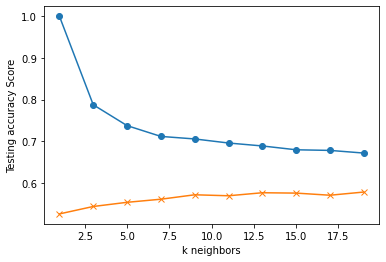

In [33]:
#plotting knn scores
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
 # Note that k: 7 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.562


In [35]:
#score of training set using cross_val_score
cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([0.55213465, 0.5771757 , 0.60303777, 0.59318555, 0.59975369])

In [36]:
#predection on the train set and confusion matrix
#cross_val_predict performs k-fold cross-validation but instead of returning evaluation scores it return the prediction made in each fold.
y_train_pred=cross_val_predict(knn, X_train_scaled, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[3989, 2101],
       [2953, 3137]])

In [37]:
#predection on the test set and confusion matrix
y_pred_knn=lr.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_knn)

array([[1764,  587],
       [ 542, 1809]])

In [38]:
#classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2351
           1       0.76      0.77      0.76      2351

    accuracy                           0.76      4702
   macro avg       0.76      0.76      0.76      4702
weighted avg       0.76      0.76      0.76      4702



In [39]:
#roc curve
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_pred_proba)

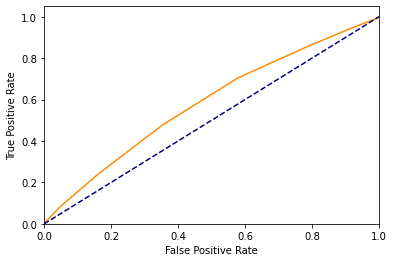

In [40]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [41]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.5825726258191081

## Support Vector Classifier

In [42]:
# Support vector machine linear classifier
svc=SVC(kernel='linear', probability=True)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [43]:
#printing the accuracy score
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

Training Score: 0.7233169129720853
Testing Score: 0.7528711186729051


In [44]:
#predection on the test set and confusion matrix
y_pred_svc=svc.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_svc)

array([[1593,  758],
       [ 404, 1947]])

In [45]:
#classification report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73      2351
           1       0.72      0.83      0.77      2351

    accuracy                           0.75      4702
   macro avg       0.76      0.75      0.75      4702
weighted avg       0.76      0.75      0.75      4702



In [46]:
#roc curve
y_proba_svc = svc.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_svc)

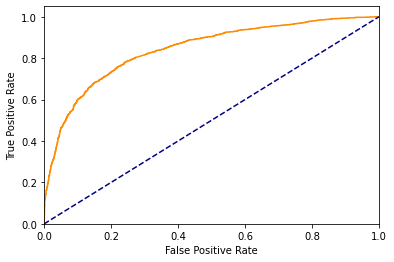

In [47]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [48]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.8418626353555805

### Tuning hyperparamaters  using Grid Search CV

In [ ]:
#### Using GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.005]}
grid_svc = GridSearchCV(svc, param_grid, cv=3, verbose=1, n_jobs=-1)

In [ ]:
grid_svc.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_svc.best_params_)

In [ ]:
# List the best score
print(grid_svc.best_score_)

In [ ]:
#best estimator
svc_b=grid_svc.best_estimator_
svc_b

In [ ]:
# Score the hypertuned model on the test dataset
svc_b.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
pred = svc_b.predict(X_test_scaled)
confusion_matrix(y_test, pred)

In [ ]:
#classification report
print(classification_report(y_test, pred))

### Tuning hyperparamaters  using Randomized Search CV

In [ ]:
#### Using RandomizedSearchCV
param_rand = {
    'C' : np.arange(0, 100, 1),
    'gamma': np.arange(0, 0.01, .0001),
}
rand_svc = RandomizedSearchCV(svc, param_rand, cv=3, n_iter=100, random_state=1, verbose=1, n_jobs=-1)

In [ ]:
rand_svc.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters for this dataset
print(rand_svc.best_params_)

In [ ]:
# List the best score
print(rand_svc.best_score_)

In [ ]:
#best estimator
svc_best=rand_svc.best_estimator_
svc_best

In [ ]:
# Score the hypertuned model on the test dataset
svc_best.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
predic = svc_best.predict(X_test_scaled)
confusion_matrix(y_test, predic)

In [ ]:
#classification report
print(classification_report(y_test, predic))

## Decision Tree 

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [50]:
#printing the accuracy score
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.4951084644831986


In [51]:
#predection on the test set and confusion matrix
y_pred_dt=dt.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_dt)

array([[1387,  964],
       [1410,  941]])

In [52]:
#classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54      2351
           1       0.49      0.40      0.44      2351

    accuracy                           0.50      4702
   macro avg       0.49      0.50      0.49      4702
weighted avg       0.49      0.50      0.49      4702



[0.00677686 0.01745438 0.06221859 0.01042073 0.01319045 0.0017911
 0.00238467 0.00447509 0.00081672 0.01360081 0.00851106 0.01745704
 0.02519029 0.01148009 0.02462667 0.11019226 0.09025308 0.02853435
 0.         0.         0.17398754 0.00031206 0.         0.
 0.00294301 0.01258915 0.002328   0.0064287  0.00366677 0.00484503
 0.01309896 0.00594021 0.01160623 0.0032552  0.0067868  0.01114223
 0.0094168  0.01153777 0.00850284 0.00546317 0.00425073 0.01002841
 0.01392671 0.01420116 0.00991929 0.         0.         0.01665411
 0.01701483 0.01038538 0.00841296 0.0041614  0.00928404 0.01080669
 0.00477555 0.00259553 0.00666945 0.00522504 0.00479523 0.01029709
 0.00363585 0.00673747 0.00267946 0.00632477 0.         0.
 0.001089   0.00586936 0.01024009 0.00737761 0.00129403 0.
 0.00952889 0.01112188 0.0072268  0.0070625  0.         0.00063252
 0.00039377 0.00151365 0.00191619 0.00238903 0.00132332 0.
 0.00029557 0.00024631 0.         0.00048909 0.00166672 0.0023178
 0.         0.        ]


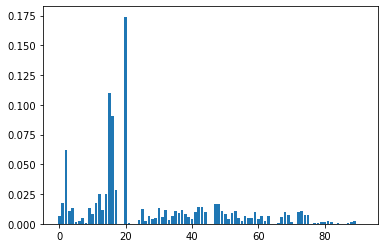

In [53]:
features_dt = dt.feature_importances_
print(features_dt)
plt.bar(x = range(len(features_dt)), height=features_dt)
plt.show()

In [54]:
#roc curve
y_proba_tree = dt.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_tree)

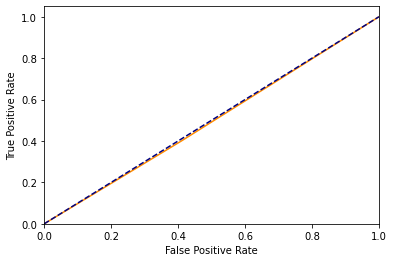

In [55]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [56]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.4951084644831987

### Tuning hyperparamaters  using Grid Search CV for Decision Tree

In [57]:
#### Using GridSearchCV
param_grid_dt = {
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=3, verbose=1, n_jobs=-1)

In [58]:
grid_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10, 100, 1000, 10000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 100, 1000, 10000]},
             verbose=1)

In [59]:
# List the best parameters for this dataset
print(grid_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1}


In [60]:
# List the best score
print(grid_dt.best_score_)

0.6810344827586207


In [61]:
#best estimator
dt_b=grid_dt.best_estimator_
dt_b

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto')

In [62]:
# Score the hypertuned model on the test dataset
dt_b.score(X_test_scaled, y_test)

0.4991492981709911

In [63]:
# Make predictions with the hypertuned model
pred_dt = dt_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_dt)

array([[1383,  968],
       [1387,  964]])

In [64]:
#classification report
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54      2351
           1       0.50      0.41      0.45      2351

    accuracy                           0.50      4702
   macro avg       0.50      0.50      0.50      4702
weighted avg       0.50      0.50      0.50      4702



### Tuning hyperparamaters  using Randomized Search CV for Decision Tree

In [65]:
#### Using GridSearchCV
param_rand_dt ={
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_dt = RandomizedSearchCV(dt, param_rand_dt, cv=3, verbose=4, n_jobs=-1)

In [66]:
rand_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000, 10000]},
                   verbose=4)

In [67]:
# List the best parameters for this dataset
print(rand_dt.best_params_)

{'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy'}


In [68]:
# List the best score
print(rand_dt.best_score_)

0.6545977011494252


In [69]:
#best estimator
dt_R_b=rand_dt.best_estimator_
dt_R_b

DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                       min_samples_leaf=10)

In [70]:
# Score the hypertuned model on the test dataset
dt_R_b.score(X_test_scaled, y_test)

0.5516801361122926

In [71]:
# Make predictions with the hypertuned model
pred_dtr = dt_R_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_dtr)

array([[1515,  836],
       [1272, 1079]])

In [72]:
#classification report
print(classification_report(y_test, pred_dtr))

              precision    recall  f1-score   support

           0       0.54      0.64      0.59      2351
           1       0.56      0.46      0.51      2351

    accuracy                           0.55      4702
   macro avg       0.55      0.55      0.55      4702
weighted avg       0.55      0.55      0.55      4702



## Bagging

## a. Random Forest Classifier
Instead of having one decision tree, we make more random trees and average their output.

In [73]:
#Random Forest classifier model
rf=RandomForestClassifier(random_state=1, n_estimators=500)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [74]:
#printing the accuracy score
print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6480221182475542


In [75]:
#score of training set using cross_val_score
cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([0.65640394, 0.75410509, 0.80541872, 0.83045977, 0.81609195])

In [76]:
#predection on the train set and confusion matrix
#cross_val_predict performs k-fold cross-validation but instead of returning evaluation scores it return the prediction made in each fold.
y_train_pred=cross_val_predict(rf, X_train_scaled, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[4609, 1481],
       [1290, 4800]])

In [77]:
#predection on the test set and confusion matrix
y_pred_rf=rf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_rf)

array([[1960,  391],
       [1264, 1087]])

In [78]:
#classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.61      0.83      0.70      2351
           1       0.74      0.46      0.57      2351

    accuracy                           0.65      4702
   macro avg       0.67      0.65      0.64      4702
weighted avg       0.67      0.65      0.64      4702



[1.64175246e-02 3.36047005e-02 3.07032294e-02 1.42239163e-02
 1.54887781e-02 2.97922850e-03 4.27051795e-03 8.55840612e-03
 1.33532005e-03 1.51577257e-02 1.16142472e-02 2.95307776e-02
 2.99764667e-02 4.53332754e-02 4.48443196e-02 5.25173382e-02
 4.98329797e-02 1.62671260e-02 0.00000000e+00 0.00000000e+00
 9.97444637e-02 6.56760511e-04 0.00000000e+00 0.00000000e+00
 4.27868968e-03 1.34563223e-02 4.63160385e-03 6.58760719e-03
 4.03294385e-03 6.17692505e-03 1.18528253e-02 1.31099214e-02
 1.40812113e-02 5.12304140e-03 7.78349300e-03 1.53878110e-02
 1.33159958e-02 1.54529099e-02 5.98482161e-03 6.83047428e-03
 7.85674268e-03 9.78167759e-03 1.39355711e-02 1.55873811e-02
 1.40840046e-02 2.93482835e-04 0.00000000e+00 1.54613564e-02
 1.62359542e-02 1.18244670e-02 1.00680524e-02 5.67200574e-03
 1.29851695e-02 1.18672718e-02 3.62464457e-03 7.08920963e-03
 7.86624182e-03 7.36513040e-03 8.69878830e-03 1.01283162e-02
 8.34738211e-03 9.97869361e-03 7.97169822e-03 8.66230546e-03
 0.00000000e+00 0.000000

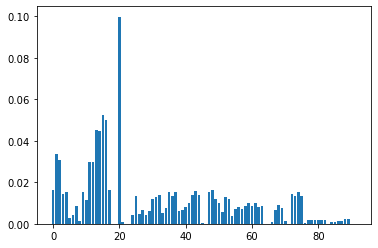

In [79]:
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

In [80]:
#roc curve
y_proba_forest = rf.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_forest)

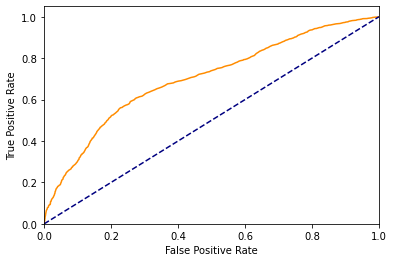

In [81]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [82]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.7009684467780347

### Tuning hyperparamaters  using Grid Search CV for Random Forest

In [ ]:
#### Using GridSearchCV
param_grid_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, verbose=1, n_jobs=-1)

In [ ]:
grid_rf.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_rf.best_params_)

In [ ]:
# List the best score
print(grid_rf.best_score_)

In [ ]:
#best estimator
rf_b=grid_rf.best_estimator_
rf_b

In [ ]:
# Score the hypertuned model on the test dataset
rf_b.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
pred_rf = rf_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_rf)

In [ ]:
#classification report
print(classification_report(y_test, pred_rf))

### Tuning hyperparamaters  using Randomized Search CV for Random Forest

In [83]:
#### Using GridSearchCV
param_rand_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rf = RandomizedSearchCV(rf, param_rand_rf, cv=3, verbose=1, n_jobs=-1)

In [84]:
rand_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=500,
                                                    random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000, 10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [85]:
# List the best parameters for this dataset
print(rand_rf.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'criterion': 'gini'}


In [86]:
# List the best score
print(rand_rf.best_score_)

0.7463875205254515


In [87]:
#best estimator
rf_R_b=rand_rf.best_estimator_
rf_R_b

RandomForestClassifier(max_depth=100, n_estimators=500, random_state=1)

In [89]:
# Score the hypertuned model on the test dataset
rf_R_b.score(X_test_scaled, y_test)

0.6480221182475542

In [91]:
# Make predictions with the hypertuned model
pred_rfr = rf_R_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_rfr)

array([[1960,  391],
       [1264, 1087]])

In [92]:
#classification report
print(classification_report(y_test, pred_rfr))

              precision    recall  f1-score   support

           0       0.61      0.83      0.70      2351
           1       0.74      0.46      0.57      2351

    accuracy                           0.65      4702
   macro avg       0.67      0.65      0.64      4702
weighted avg       0.67      0.65      0.64      4702



## b. Extremely Random Trees
Changing the behavior of the decision trees so that they randomly choose their splits

In [93]:
et = ExtraTreesClassifier(random_state=1, n_estimators=500)
et.fit(X_train_scaled, y_train)

ExtraTreesClassifier(n_estimators=500, random_state=1)

In [94]:
#printing the accuracy score
print(f'Training Score: {et.score(X_train_scaled, y_train)}')
print(f'Testing Score: {et.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.5616758826031476


In [95]:
#predection on the test set and confusion matrix
y_pred_et=et.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_et)

array([[1436,  915],
       [1146, 1205]])

In [96]:
#classification report
print(classification_report(y_test, y_pred_et))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58      2351
           1       0.57      0.51      0.54      2351

    accuracy                           0.56      4702
   macro avg       0.56      0.56      0.56      4702
weighted avg       0.56      0.56      0.56      4702



[0.01600107 0.03540028 0.02068486 0.01212362 0.01255586 0.00776396
 0.01101582 0.0114585  0.00546554 0.01225651 0.01176191 0.02125612
 0.02090438 0.03055924 0.03055292 0.02855789 0.03708593 0.01417865
 0.         0.         0.04140359 0.00240016 0.         0.
 0.00776113 0.01157247 0.01103143 0.01150135 0.0105354  0.01186606
 0.01187661 0.0114436  0.01286715 0.01120288 0.012909   0.01290483
 0.01263438 0.01293985 0.01211667 0.01211123 0.01227896 0.0134272
 0.01182413 0.01296672 0.01273849 0.00087214 0.         0.0132648
 0.01390417 0.01264285 0.01257188 0.01091592 0.01242213 0.01437716
 0.00872184 0.0117618  0.0117489  0.01147388 0.0115683  0.01208937
 0.01149101 0.01171936 0.01175035 0.01142071 0.         0.
 0.00321407 0.01234736 0.01215846 0.01286414 0.00549558 0.
 0.01177573 0.01158606 0.01294428 0.01185346 0.0006376  0.00650856
 0.0054115  0.00638481 0.00771554 0.00773449 0.00584826 0.
 0.00406623 0.00424654 0.0053567  0.00530415 0.00371296 0.00400252
 0.00010817 0.00010993]


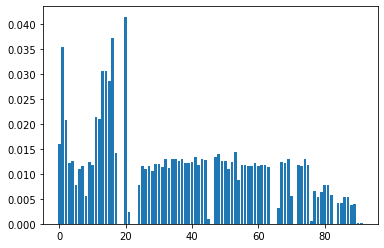

In [97]:
features_et = et.feature_importances_
print(features_et)
plt.bar(x = range(len(features_et)), height=features_et)
plt.show()

In [98]:
#roc curve
y_proba_rand_tree = et.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_rand_tree)

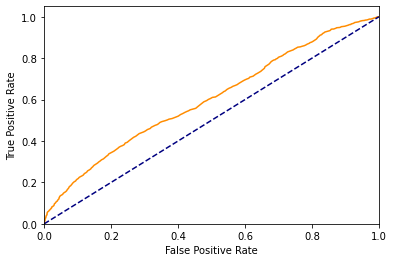

In [99]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [100]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.6001901324015536

### Tuning hyperparamaters  using Grid Search CV for Extremely Random Tree

In [ ]:
#### Using GridSearchCV
param_grid_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_rt = GridSearchCV(rt, param_grid_rt, cv=3, verbose=1, n_jobs=-1)

In [ ]:
grid_rt.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_rt.best_params_)

In [ ]:
# List the best score
print(grid_rt.best_score_)

In [ ]:
#best estimator
rt_b=grid_rt.best_estimator_
rt_b

In [ ]:
# Score the hypertuned model on the test dataset
rt_b.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
pred_rt = rt_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_rt)

In [ ]:
#classification report
print(classification_report(y_test, pred_rt))

### Tuning hyperparamaters  using Randomized Search CV for Extremely Random Tree

In [102]:
#### Using GridSearchCV
param_rand_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rt = RandomizedSearchCV(et, param_rand_rt, cv=3, verbose=1, n_jobs=-1)

In [103]:
rand_rt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=ExtraTreesClassifier(n_estimators=500,
                                                  random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 1000, 10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 100, 1000,
                                                             10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [104]:
# List the best parameters for this dataset
print(rand_rt.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 1000, 'criterion': 'gini'}


In [105]:
# List the best score
print(rand_rt.best_score_)

0.6882594417077176


In [106]:
#best estimator
rt_R_b=rand_rt.best_estimator_
rt_R_b

ExtraTreesClassifier(max_depth=1000, min_samples_leaf=10, n_estimators=500,
                     random_state=1)

In [107]:
# Score the hypertuned model on the test dataset
rt_R_b.score(X_test_scaled, y_test)

0.5467886005954913

In [108]:
# Make predictions with the hypertuned model
pred_rt_R = rt_R_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_rt_R)

array([[1247, 1104],
       [1027, 1324]])

In [109]:
#classification report
print(classification_report(y_test, pred_rt_R))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54      2351
           1       0.55      0.56      0.55      2351

    accuracy                           0.55      4702
   macro avg       0.55      0.55      0.55      4702
weighted avg       0.55      0.55      0.55      4702



## Boosting
In Bosting each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [110]:
ab = AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1)
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=1)

In [111]:
#printing the accuracy score
print(f'Training Score: {ab.score(X_train_scaled, y_train)}')
print(f'Testing Score: {ab.score(X_test_scaled, y_test)}')

Training Score: 0.7564039408866995
Testing Score: 0.726286686516376


In [112]:
#predection on the test set and confusion matrix
y_pred_ab=ab.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_ab)

array([[1797,  554],
       [ 733, 1618]])

In [113]:
#classification report
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      2351
           1       0.74      0.69      0.72      2351

    accuracy                           0.73      4702
   macro avg       0.73      0.73      0.73      4702
weighted avg       0.73      0.73      0.73      4702



[0.    0.035 0.125 0.    0.    0.    0.    0.    0.    0.    0.    0.01
 0.025 0.02  0.04  0.25  0.165 0.08  0.    0.    0.135 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.005 0.02
 0.    0.    0.005 0.    0.005 0.02  0.    0.    0.    0.    0.    0.
 0.01  0.005 0.    0.    0.005 0.015 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.005 0.    0.    0.    0.
 0.005 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.005 0.01  0.    0.   ]


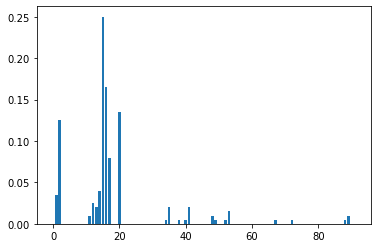

In [114]:
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

In [115]:
#roc curve
y_proba_ab = ab.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_ab)

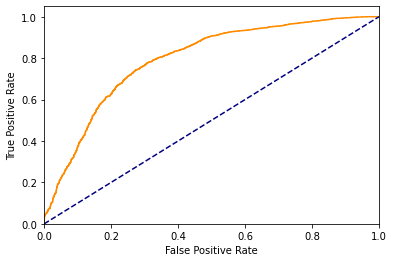

In [116]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [117]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.7926496611937942

In [118]:

def model_tester(model, X_train_scaled, X_test_scaled,y_train, y_test):
    clf = model.fit(X_train_scaled, y_train)
    y_pred=clf.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    
model_tester(AdaBoostClassifier(random_state=1, n_estimators=100), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=500, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=1000, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=2000, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)

              precision    recall  f1-score   support

           0       0.64      0.56      0.60      2351
           1       0.61      0.69      0.65      2351

    accuracy                           0.62      4702
   macro avg       0.63      0.62      0.62      4702
weighted avg       0.63      0.62      0.62      4702

Training Score: 0.7808702791461413
Testing Score: 0.6246278179498086
              precision    recall  f1-score   support

           0       0.63      0.54      0.58      2351
           1       0.60      0.68      0.64      2351

    accuracy                           0.61      4702
   macro avg       0.61      0.61      0.61      4702
weighted avg       0.61      0.61      0.61      4702

Training Score: 0.7951559934318555
Testing Score: 0.6097405359421523
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      2351
           1       0.74      0.69      0.72      2351

    accuracy                           0.73 

## Trying to improve score by selecting important features based on Adaboster Classifier


In [119]:
sel = SelectFromModel(ab)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=AdaBoostClassifier(learning_rate=0.1,
                                             n_estimators=200, random_state=1))

In [120]:
sel.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [121]:
X_train_sel=sel.transform(X_train_dumy)
X_test_sel=sel.transform(X_test_dumy)

scaler = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler.transform(X_train_sel)
X_selected_test_scaled = scaler.transform(X_test_sel)


### Logistic Regression after selecting important features

In [122]:
lr_s = LogisticRegression()
lr_s.fit(X_selected_train_scaled, y_train)

LogisticRegression()

In [123]:
#before model selection
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

Training Score: 0.710919540229885
Testing Score: 0.7598894087622289


In [124]:
#after model selection
print(f'Training Score: {lr_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7094417077175698
Testing Score: 0.7888132709485325


### KNeighborsClassifier after selecting important features

In [125]:
knn_s=KNeighborsClassifier(n_neighbors=3)
knn_s.fit(X_selected_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [126]:
#before model selection
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')

Training Score: 0.7010673234811166
Testing Score: 0.5618885580603998


In [127]:
#after model selection
print(f'Training Score: {knn_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {knn_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.843431855500821
Testing Score: 0.5559336452573373


### SVC after electing important features

In [128]:
# Support vector machine linear classifier
svc_s=SVC(kernel='linear')
svc_s.fit(X_selected_train_scaled, y_train)

SVC(kernel='linear')

In [129]:
#before model selection
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

Training Score: 0.7233169129720853
Testing Score: 0.7528711186729051


In [130]:
#after model selection
print(f'Training Score: {svc_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {svc_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7118226600985221
Testing Score: 0.7813696299447044


### Decision Tree after electing important features

In [131]:
dt_s = DecisionTreeClassifier()
dt_s.fit(X_selected_train_scaled, y_train)

DecisionTreeClassifier()

In [132]:
#before model selection
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.4951084644831986


In [133]:
#after model selection
print(f'Training Score: {dt_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {dt_s.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.46533390046788603
[CV 2/3] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=100;, score=0.633 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=10;, score=0.596 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=100, max_features=log2, min_samples_leaf=1;, score=0.595 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=10;, score=0.531 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10000, max_features=log2, min_samples_leaf=100;, score=0.652 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=100;, score=0.563 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5;, score=0.587 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1000;, score=0.582 total time=   0.0s
[CV 2/

## Real and predicted value using different model

In [ ]:
#making dataframe on evaluation metrices
evaluation_df=pd.DataFrame({'logistic Reg':[lin_r2_lr,lin_mae_lr,lin_rmse_lr],
                           'knn':[lin_r2_lrl,lin_mae_lrl,lin_rmse_lrl],
                            'svc':[lin_r2_lrr,lin_mae_lrr,lin_rmse_lrr],
                            'Decision Tree':[lin_r2_svm,lin_mae_svm,lin_rmse_svm],
                           'Random Forest':[lin_r2_dt,lin_mae_dt,lin_rmse_dt],
                            'Extra Random Tree':[lin_r2_rf,lin_mae_rf,lin_rmse_rf],
                           'Ada Boost':[lin_r2_rf,lin_mae_rf,lin_rmse_rf]}
                           ,index=['R2','Mean Absolute Error',
                                    'Root Mean Squared Error'])
evaluation_df

In [142]:
#Predected value
y_pred_lr=lr.predict(X_test_scaled)
y_pred_knn=knn.predict(X_test_scaled)
y_pred_svc=svc.predict(X_test_scaled)
y_pred_dt=dt_b.predict(X_test_scaled)
y_pred_rf=rf_R_b.predict(X_test_scaled)
y_pred_et=et.predict(X_test_scaled)
y_pred_ab=ab.predict(X_test_scaled)

In [143]:
df_pred=pd.DataFrame({'loan risk':y_test,
                     'logistic Regression':y_pred_lr,
                     'knn':y_pred_lr,
                     'svc':y_pred_svc,
                     'Decision Tree':y_pred_dt,
                     'Random Forest':y_pred_rf,
                     'Extra Random Tree':y_pred_et,
                     'Ada Boost':y_pred_ab})
df_pred.replace({1:'Low Risk', 0: 'High Risk'}, inplace=True)
df_pred

,loan risk,logistic Regression,knn,svc,Decision Tree,Random Forest,Extra Random Tree,Ada Boost
0,Low Risk,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk
1,Low Risk,Low Risk,Low Risk,Low Risk,High Risk,High Risk,High Risk,High Risk
2,Low Risk,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk
3,Low Risk,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk
4,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk,High Risk,High Risk,Low Risk
...,...,...,...,...,...,...,...,...
4697,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk
4698,High Risk,High Risk,High Risk,High Risk,Low Risk,High Risk,Low Risk,High Risk
4699,High Risk,High Risk,High Risk,High Risk,Low Risk,High Risk,High Risk,High Risk
4700,High Risk,High Risk,High Risk,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk


In [148]:
#20 random sample
df_samp=df_pred.sample(20)
df_samp

,loan risk,logistic Regression,knn,svc,Decision Tree,Random Forest,Extra Random Tree,Ada Boost
2049,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk
809,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk,High Risk,High Risk,Low Risk
4565,High Risk,Low Risk,Low Risk,Low Risk,High Risk,High Risk,High Risk,High Risk
823,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk,Low Risk
2105,Low Risk,Low Risk,Low Risk,Low Risk,High Risk,High Risk,Low Risk,Low Risk
3622,High Risk,High Risk,High Risk,High Risk,Low Risk,High Risk,High Risk,High Risk
439,Low Risk,Low Risk,Low Risk,Low Risk,High Risk,High Risk,High Risk,High Risk
3316,High Risk,Low Risk,Low Risk,High Risk,High Risk,High Risk,High Risk,High Risk
1523,Low Risk,Low Risk,Low Risk,Low Risk,High Risk,Low Risk,Low Risk,Low Risk
3749,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk,High Risk


In [149]:
df_samp.iloc[0]


loan risk              Low Risk
logistic Regression    Low Risk
knn                    Low Risk
svc                    Low Risk
Decision Tree          Low Risk
Random Forest          Low Risk
Extra Random Tree      Low Risk
Ada Boost              Low Risk
Name: 2049, dtype: object

In [166]:
#Saving the model
import joblib
joblib.dump(lr, 'model.pkl')

['model.pkl']

In [167]:
test=X_test_scaled[1,:]

In [168]:
model=joblib.load('model.pkl')

In [169]:
model.predict([test])

array([1])

In [171]:
#getting one row of x test for using our saved model
test=X_test_scaled[1,:]


In [153]:
a=[ 
       -0.32161962,  0.53241319, -1.09847224, -0.34846352, -0.68865934,
       -0.66751038,  0.92458829,  0.92469942, -0.12542725, -0.12527897,
       -0.26370283,  0.16682447, -0.15154547,  0.        ,  0.        ,
        0.12188388, -0.13228227,  0.        ,  0.        , -0.12971143,
       -0.26347114, -0.03849206, -0.7781392 ,  1.13019797,  0.63747349,
       -0.57359912, -0.51402557,  1.07519192, -0.86266836, -1.05118707,
       -0.91910193, -0.0299211 , -0.6726128 ,  0.3398513 , -0.23495702,
       -0.12775369, -0.61336424,  0.33042721, -0.08378414, -1.3995949 ,
       -0.07787659,  0.        , -1.16682101, -0.12639693,  1.2963634 ,
       -0.15824022,  1.04207093,  0.40179666, -0.20235968, -0.36151731,
       -0.3774007 , -0.79646299, -0.38016478, -0.51079775, -0.46366848,
       -0.92112088, -0.78102677, -0.7975275 , -1.09620713,  0.        ,
        0.        , -0.16299037, -0.17423313,  0.6123892 , -0.97666803,
       -0.34846352,  0.        , -0.32334212, -0.71721983, -0.48916178,
       -0.70225095, -0.07324786,  1.06482263, -0.36631109, -0.82968892,
        1.12537468, -0.81551933, -0.43539556,  0.        , -0.30086276,
        0.30086276,  0.41764662, -0.41764662,  0.16843038, -0.16843038,
        0.02026518, -0.02026518]
b=[0.70076538,  0.03728883,  0.22835062, -0.34677695, -0.30558016]

[[-0.32161962,
  0.53241319,
  -1.09847224,
  -0.34846352,
  -0.68865934,
  -0.66751038,
  0.92458829,
  0.92469942,
  -0.12542725,
  -0.12527897,
  -0.26370283,
  0.16682447,
  -0.15154547,
  0.0,
  0.0,
  0.12188388,
  -0.13228227,
  0.0,
  0.0,
  -0.12971143,
  -0.26347114,
  -0.03849206,
  -0.7781392,
  1.13019797,
  0.63747349,
  -0.57359912,
  -0.51402557,
  1.07519192,
  -0.86266836,
  -1.05118707,
  -0.91910193,
  -0.0299211,
  -0.6726128,
  0.3398513,
  -0.23495702,
  -0.12775369,
  -0.61336424,
  0.33042721,
  -0.08378414,
  -1.3995949,
  -0.07787659,
  0.0,
  -1.16682101,
  -0.12639693,
  1.2963634,
  -0.15824022,
  1.04207093,
  0.40179666,
  -0.20235968,
  -0.36151731,
  -0.3774007,
  -0.79646299,
  -0.38016478,
  -0.51079775,
  -0.46366848,
  -0.92112088,
  -0.78102677,
  -0.7975275,
  -1.09620713,
  0.0,
  0.0,
  -0.16299037,
  -0.17423313,
  0.6123892,
  -0.97666803,
  -0.34846352,
  0.0,
  -0.32334212,
  -0.71721983,
  -0.48916178,
  -0.70225095,
  -0.07324786,
  1.064